<a href="https://colab.research.google.com/github/kaustavr19/Football-Analytics-using-Python-7-Day-Workshop/blob/main/Day_2_Pandas_%26_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Manipulation

## What is library in python?
It is nothing but a collection of functions used to accomplish a common objective.

For eg., if we want to work with tables, we would use "pandas". For mathematical operations, we use "math"

In [1]:
#Data manipulation libraries:
import io
import pandas as pd

#Plotting libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## The pandas library
According to the Wikipedia page for pandas, the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

PS: It has nothing to do with the Kung Fu type pandas :D

## Pandas dataframe
It is nothing but a collection of rows and columns arranged in a structed tabular format with values inside. Basically, pandas DataFrame is a 2D dictionary i.e. it is a 2D Data Structure in python.

In very simple terms, it is equivalent to an Excel Worksheet.

In [2]:
d = {'col1':[1,2], 'col2':[3,4]}
df = pd.DataFrame(data=d)

In [3]:
df

,col1,col2
0,1,3
1,2,4


In [4]:
#df.loc["index","col"]
df.loc[0,'col1']

1

In [5]:
df.loc[0,'col2']

3

In [6]:
df.loc[0,'col1'] = 25
df

,col1,col2
0,25,3
1,2,4


In [7]:
df["col3"] = [5,6]
df

,col1,col2,col3
0,25,3,5
1,2,4,6


In [8]:
df[['col1','col3']]

,col1,col3
0,25,5
1,2,6


In [9]:
#add 3 more rows in df
df.loc[2] = [7,8,9]
df.loc[3] = ['a','b','c']
df.loc[4] = ['x','y','z']
df

,col1,col2,col3
0,25,3,5
1,2,4,6
2,7,8,9
3,a,b,c
4,x,y,z


In [10]:
df.loc[[0,4],['col1','col3']]

,col1,col3
0,25,5
4,x,z


In [11]:
df.loc[[0,4,2],['col1','col3']]

,col1,col3
0,25,5
4,x,z
2,7,9


### Reading a csv file as a pandas DataFrame

In [12]:
from google.colab import files

In [13]:
uploaded = files.upload()

Saving isl_data.csv to isl_data.csv


In [14]:
isl_df = pd.read_csv(io.BytesIO(uploaded['isl_data.csv']))
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
5,Jamshedpur,6,20,7,7,6,21,22,27
6,Bengaluru FC,7,20,5,8,7,26,28,22
7,Chennaiyin FC,8,20,3,6,11,17,23,20
8,SC East Bengal,9,20,3,9,8,22,33,17
9,Kerala Blasters,10,20,3,9,8,23,36,17


#### Simple Pandas operations

In [15]:
#get summary info of the dataframe
isl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team.name      11 non-null     object
 1   position       11 non-null     int64 
 2   matches        11 non-null     int64 
 3   wins           11 non-null     int64 
 4   losses         11 non-null     int64 
 5   draws          11 non-null     int64 
 6   scoresFor      11 non-null     int64 
 7   scoresAgainst  11 non-null     int64 
 8   points         11 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 920.0+ bytes


In [16]:
#basic statistical values for each column:
isl_df.describe().round(1)

,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,6.0,20.0,6.2,6.2,7.6,26.0,26.0,26.2
std,3.3,0.0,3.5,3.1,2.5,5.2,8.6,9.4
min,1.0,20.0,2.0,3.0,4.0,17.0,15.0,12.0
25%,3.5,20.0,3.0,3.5,6.0,22.5,20.5,18.5
50%,6.0,20.0,6.0,6.0,8.0,26.0,23.0,27.0
75%,8.5,20.0,7.5,8.5,9.5,29.5,30.5,32.0
max,11.0,20.0,12.0,12.0,11.0,35.0,44.0,40.0


In [19]:
isl_df['scoresFor']

0     35
1     28
2     31
3     31
4     27
5     21
6     26
7     17
8     22
9     23
10    25
Name: scoresFor, dtype: int64

In [17]:
isl_df.scoresFor.sum()

286

### Filtering and Slicing techniques
#### Slicing using loc parameter

In [20]:
#get the info for the 1st ranked team
# since we know that the 1st ranked team is on the first row, we can use the loc parameter and insert the inedx value directly
isl_df.loc[0]

team.name        Mumbai City FC
position                      1
matches                      20
wins                         12
losses                        4
draws                         4
scoresFor                    35
scoresAgainst                18
points                       40
Name: 0, dtype: object

In [21]:
isl_df.iloc[-1]

team.name        Odisha Football Club
position                           11
matches                            20
wins                                2
losses                             12
draws                               6
scoresFor                          25
scoresAgainst                      44
points                             12
Name: 10, dtype: object

In [22]:
# Let's say that we do not know for sure in which row is the info for the team ranked 1st.
# This uncertainity can be easily rectified by replacing the index value with a condition.
isl_df.loc[isl_df['position'] == 1]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40


In [23]:
# Let's see what is happening inside those brackets:
isl_df["position"] == 1

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: position, dtype: bool

In [24]:
isl_df['scoresFor'] >25

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7     False
8     False
9     False
10    False
Name: scoresFor, dtype: bool

In [25]:
isl_df.loc[[0,2,4,6]]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
2,Northeast United,3,20,8,3,9,31,25,33
4,Hyderabad FC,5,20,6,3,11,27,19,29
6,Bengaluru FC,7,20,5,8,7,26,28,22


In [27]:
# Obtain information for all the teams who scored more than 28 goals
isl_df.loc[isl_df['scoresFor'] > 28]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31


In [28]:
# Now let's obtain only the team name for the same condition as above and not all the columns.
isl_df.loc[isl_df['scoresFor'] > 25, 'team.name']

0        Mumbai City FC
1    ATK Mohun Bagan FC
2      Northeast United
3                FC Goa
4          Hyderabad FC
6          Bengaluru FC
Name: team.name, dtype: object

In [29]:
# We can even put it inside a list:
isl_df.loc[isl_df['scoresFor'] > 25, 'team.name'].to_list()

['Mumbai City FC',
 'ATK Mohun Bagan FC',
 'Northeast United',
 'FC Goa',
 'Hyderabad FC',
 'Bengaluru FC']

In [30]:
# Now let's look at multiple conditions: 
isl_df.loc[(isl_df['scoresFor']>25) & (isl_df['scoresAgainst'] <=25),'team.name']

0        Mumbai City FC
1    ATK Mohun Bagan FC
2      Northeast United
3                FC Goa
4          Hyderabad FC
Name: team.name, dtype: object

In [31]:
# Now let's look at multiple conditions: 
isl_df.loc[(isl_df['scoresFor']>25) & (isl_df['scoresAgainst'] <25),'team.name']

0        Mumbai City FC
1    ATK Mohun Bagan FC
3                FC Goa
4          Hyderabad FC
Name: team.name, dtype: object

Let's add a column called "Score difference"
There are 2 ways to add a new column --> at the end of the dataframe or at a specific location in the dataframe

In [32]:
isl_df['scoreDiff'] = isl_df['scoresFor'].sub(isl_df['scoresAgainst'])
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points,scoreDiff
0,Mumbai City FC,1,20,12,4,4,35,18,40,17
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40,13
2,Northeast United,3,20,8,3,9,31,25,33,6
3,FC Goa,4,20,7,3,10,31,23,31,8
4,Hyderabad FC,5,20,6,3,11,27,19,29,8
5,Jamshedpur,6,20,7,7,6,21,22,27,-1
6,Bengaluru FC,7,20,5,8,7,26,28,22,-2
7,Chennaiyin FC,8,20,3,6,11,17,23,20,-6
8,SC East Bengal,9,20,3,9,8,22,33,17,-11
9,Kerala Blasters,10,20,3,9,8,23,36,17,-13


In [33]:
#drop the column to reuse the same name:
isl_df.drop(columns=['scoreDiff'],inplace = True)
#at a specific location
isl_df.insert(8,'scoreDiff',isl_df['scoresFor'].sub(isl_df['scoresAgainst']))
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,scoreDiff,points
0,Mumbai City FC,1,20,12,4,4,35,18,17,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,13,40
2,Northeast United,3,20,8,3,9,31,25,6,33
3,FC Goa,4,20,7,3,10,31,23,8,31
4,Hyderabad FC,5,20,6,3,11,27,19,8,29
5,Jamshedpur,6,20,7,7,6,21,22,-1,27
6,Bengaluru FC,7,20,5,8,7,26,28,-2,22
7,Chennaiyin FC,8,20,3,6,11,17,23,-6,20
8,SC East Bengal,9,20,3,9,8,22,33,-11,17
9,Kerala Blasters,10,20,3,9,8,23,36,-13,17


# Plotting

It is one of the most important forms of communication for Data Scienctists, especially for Football Analysts. It is the best way to explain and express your analysis and ideas to coaches and players.

## The matplotlib library

In [34]:
# matplotlib library is used to plot graphs (bar graph, scatter plot)
import matplotlib.pyplot as plt

In [35]:
# for giving x-axis/y-axis, we can give it in form of list, range or pandas series

x_axis = [2016, 2017, 2018, 2019, 2020] 
y_axis = [190, 213, 182, 196, 201]

### Bar Plot

<BarContainer object of 5 artists>

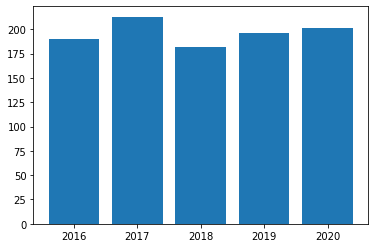

In [36]:
plt.bar(x_axis, y_axis)

### Scatter Plot

In [37]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

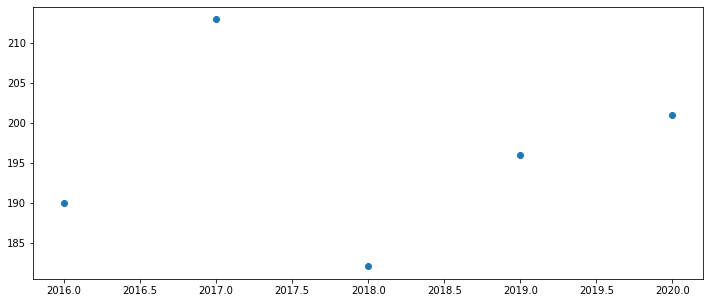

In [38]:
plt.figure(figsize=(12,5))
plt.scatter(x_axis, y_axis)

([<matplotlib.axis.XTick at 0x7ff826ad8490>,
 <a list of 5 Text major ticklabel objects>)

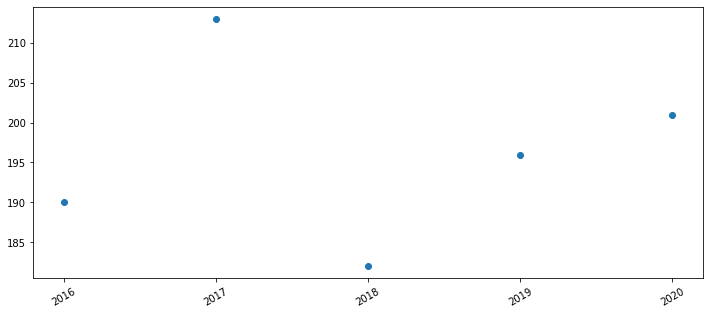

In [39]:
plt.figure(figsize=(12,5))
plt.scatter(x_axis, y_axis)
plt.xticks(x_axis, rotation=30)

### Adding colors to plots

<BarContainer object of 5 artists>

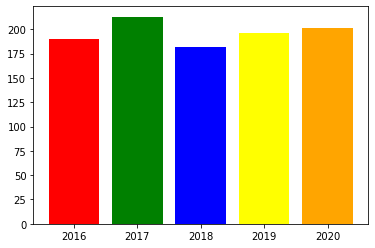

In [40]:
# color parameter is used to give colors to each bar of bar graph
plt.bar(x_axis, y_axis, color = ["red", "green", "blue", "yellow", "orange"])

In [41]:
print(x_axis)
print(y_axis)

[2016, 2017, 2018, 2019, 2020]
[190, 213, 182, 196, 201]


In [42]:
colors = []
colors.append(2)
print(colors)

[2]


In [43]:
# If the goals are less than 50, then color it as red, if they are greater than or equal to 70, color them green, else yellow everywhere

colors = []
for i in y_axis:
    if i<190:
        colors.append("Red")
    elif i>=200:
        colors.append("Green")
    else:
        colors.append("Orange")

colors

['Orange', 'Green', 'Red', 'Orange', 'Green']

<BarContainer object of 5 artists>

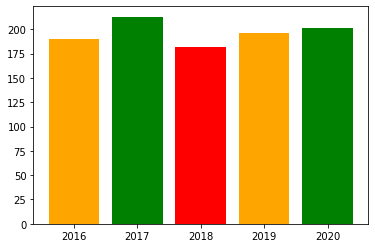

In [44]:
plt.bar(x_axis, y_axis, color=colors)

## The seaborn library

In [45]:
# seaborn is a library built on top of matplotlib and is very efficient and easy-to-use when it comes to dataframes
import seaborn as sns

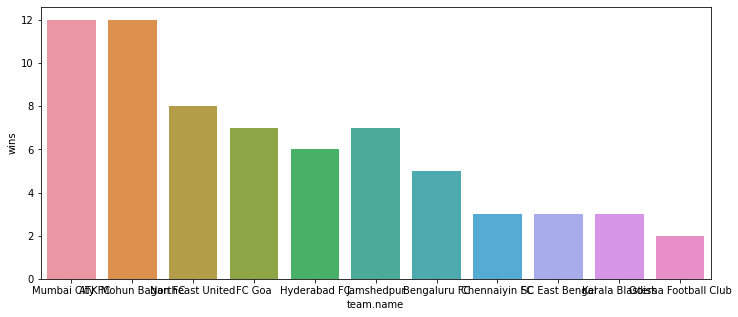

In [46]:
plt.figure(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

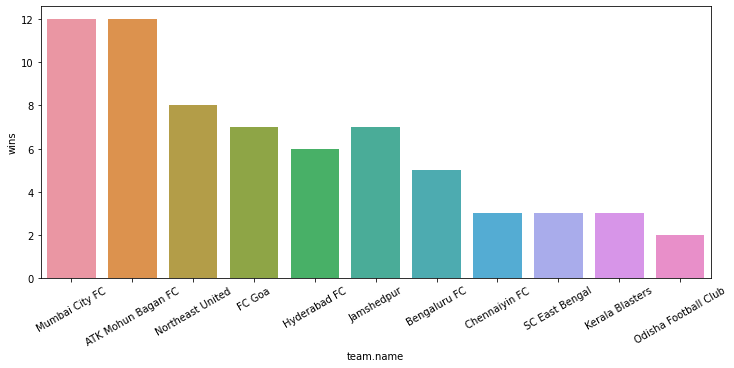

In [47]:
plt.figure(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)
plt.xticks(rotation=30)

Text(0, 0.5, '')

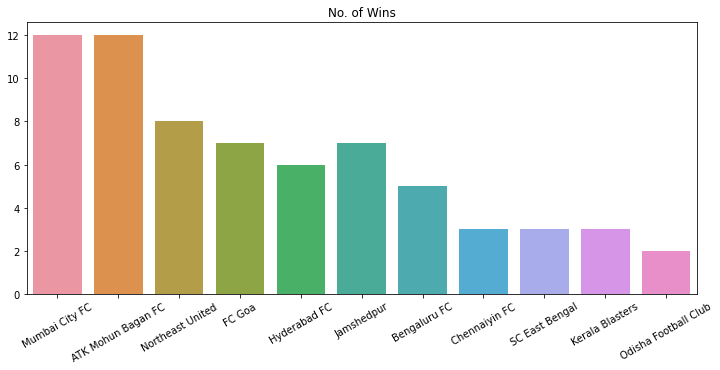

In [49]:
plt.figure(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)
plt.xticks(rotation=30)
plt.title('No. of Wins')
plt.xlabel("")
plt.ylabel("")

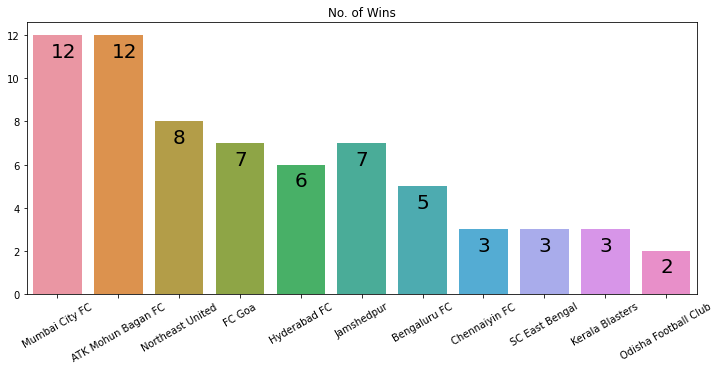

In [50]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x="team.name",y="wins",data=isl_df)
plt.xticks(rotation=30)
plt.title('No. of Wins')
plt.xlabel("")
plt.ylabel("")
#adding labels to the bars
for p, label in zip(ax.patches, isl_df["wins"].values):
  ax.annotate(label, (p.get_x()+0.3, p.get_height()-1),size=20)

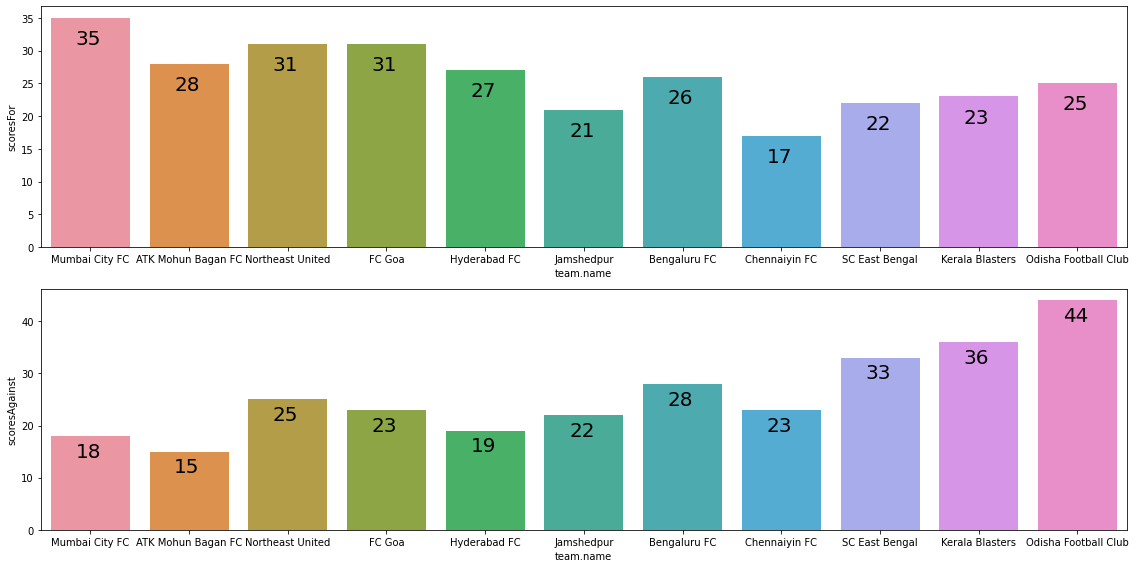

In [51]:
# Bonus Lecture:

fig, ax_sp = plt.subplots(2, 1, figsize=(16, 8))
sns.barplot(data=isl_df, x="team.name", y="scoresFor", ax=ax_sp[0])
sns.barplot(data=isl_df, x="team.name", y="scoresAgainst", ax=ax_sp[1])
# Annotate the graph i.e add data labels:
for p, label in zip(ax_sp[0].patches, isl_df["scoresFor"].values):
    ax_sp[0].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
for p, label in zip(ax_sp[1].patches, isl_df["scoresAgainst"].values):
    ax_sp[1].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
plt.tight_layout()